
# Simple Linear Regression – Two Approaches

In this notebook, we walk through the implementation of **Simple Linear Regression** using two methods:
1. A manual approach using basic arithmetic operations (no linear algebra).
2. A matrix-based approach using linear algebra.

We'll also plot the resulting regression line to visualize the fit.


In [4]:

import numpy as np
from matplotlib import pyplot as plt



## Load Dataset

We load a CSV dataset containing two columns: the input feature `x` and the output variable `y`.


In [5]:

data = np.loadtxt('data/1.01. Simple linear regression.csv', delimiter=',', skiprows=1)
print("Input feature values (x):", data[:,1])


Input feature values (x): [2.4  2.52 2.54 2.74 2.83 2.91 3.   3.   3.01 3.01 3.02 3.07 3.08 3.08
 3.12 3.17 3.17 3.17 3.17 3.19 3.19 3.19 3.2  3.21 3.24 3.28 3.28 3.28
 3.28 3.28 3.28 3.28 3.29 3.29 3.29 3.31 3.32 3.34 3.37 3.37 3.37 3.38
 3.38 3.39 3.39 3.4  3.4  3.4  3.41 3.41 3.41 3.42 3.42 3.42 3.44 3.47
 3.47 3.47 3.47 3.48 3.49 3.49 3.5  3.51 3.51 3.52 3.52 3.54 3.58 3.58
 3.59 3.59 3.6  3.6  3.61 3.62 3.64 3.65 3.71 3.71 3.71 3.73 3.76 3.81]



## Method 1: Simple Linear Regression (From Scratch)

We use the formula for slope and intercept based on the summation of x, y, x², and xy values.

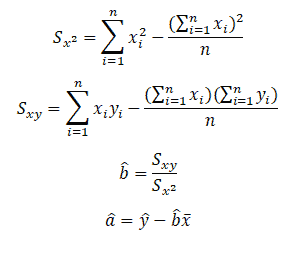


In [6]:

# Find number of datapoints and basic summed variables to start with
n = len(data[:,1])
x = np.sum(data[:,1])
y = np.sum(data[:,0])
xx = np.sum(data[:,1] * data[:,1])
xy = np.sum(data[:,1] * data[:,0])

# Calculate the sum of squares and cross-products
Sxx = xx - (x*x)/n
Sxy = xy - (x*y)/n

# Compute the slope (b1) and intercept (b0)
b1 = Sxy/Sxx
b0 = y/n - b1*x/n

print(f"Manual method: y = {b1:.4f}x + {b0:.4f}")


Manual method: y = 245.2176x + 1028.6407


# Method 2: Using Linear Algebra

> This approach is useful when you have multiple variables you need to predict from, and computing each manually is difficult. With matrix math, we can calculate and compute multiple variables simultaneously!

We want to fit a line:  
$\displaystyle y = b_0 + b_1 x$

In matrix form, this is:  
$\displaystyle y = X \cdot B$

Where:  
- **X** is the *design matrix* (first column all 1s for the intercept, second column is x values)  
- **B** is the vector of coefficients $[b_0, b_1]$  
- **y** is the vector of target values

The **normal equation** for calculating the coefficient matrix is:  
$\displaystyle B = (X^T X)^{-1} X^T y$


In [7]:
# Step 1: Construct the design matrix X
#   - np.ones(n): creates a column of 1s (for the intercept)
#   - data[:, 1]: the x values (feature)
xMatrix = np.column_stack((np.ones(n), data[:, 1]))

# Step 2: Transpose X and multiply it with itself (X^T * X)
#   - This gives us a square matrix that we can invert
xSquare = xMatrix.T @ xMatrix

# Step 3: Compute the inverse of that square matrix
xInv = np.linalg.inv(xSquare)

# Step 4: Multiply everything together to get B (the coefficients)
#   - data[:, 0]: the target values (y)
#   - This follows the "normal equation": B = (X^T X)^(-1) X^T y
bMatrix = xInv @ xMatrix.T @ data[:, 0]

# Step 6: Extract the coefficients
b00 = bMatrix[0]  # Intercept
b11 = bMatrix[1]  # Slope

print(f"Linear Algebra method: y = {b11:.4f}x + {b00:.4f}")


Linear Algebra method: y = 245.2176x + 1028.6407



## Visualizing the Regression Line

Let's plot the data points along with the regression line to see how well it fits!


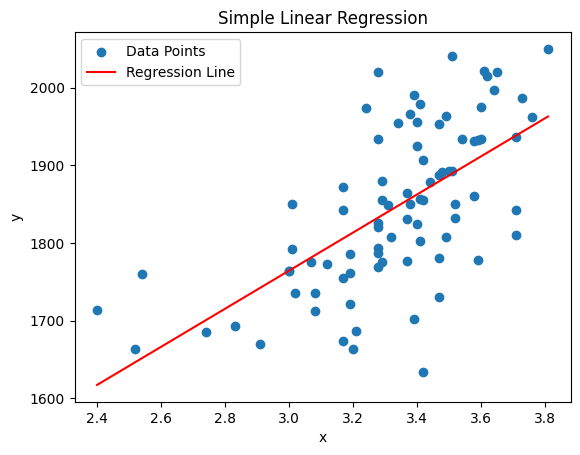

In [8]:

plt.scatter(data[:,1], data[:,0], label='Data Points')
plt.plot(data[:,1], b11*data[:,1]+b00, color='red', label='Regression Line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()
